In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load datasets
pos = pd.read_csv('./FINALProcessed_wellbeing_text.csv', encoding='UTF-8', header=None)
neg = pd.read_csv('./FINALProcessed_non_wellbeing_text.csv', encoding='UTF-8', header=None)

In [4]:
# Combine data and labels
x = np.concatenate((pos[0], neg[0]))  # Assuming column 0 contains the text
y = np.concatenate((np.ones(len(pos)), np.zeros(len(neg))))  # 1 for positive, 0 for negative

In [5]:
# Shuffle and split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Replace missing values in x_train and x_test
x_train = pd.Series(x_train).fillna("").tolist()  # Replace NaN with empty strings
x_test = pd.Series(x_test).fillna("").tolist()

# Use TfidfVectorizer for text representation
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

In [39]:
# Train the SVM model
model = SVC(kernel='rbf', verbose=True, probability=True,)
model.fit(x_train_tfidf, y_train)

[LibSVM]

SVC(probability=True, verbose=True)

In [40]:
# Save the model and vectorizer for later use
joblib.dump(model, './wellbeing_svm_tfidf.pkl')
joblib.dump(tfidf_vectorizer, './tfidf_vectorizer.pkl')

['./tfidf_vectorizer.pkl']

Accuracy on test set: 0.868421052631579

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.91      0.89        22
         1.0       0.87      0.81      0.84        16

    accuracy                           0.87        38
   macro avg       0.87      0.86      0.86        38
weighted avg       0.87      0.87      0.87        38



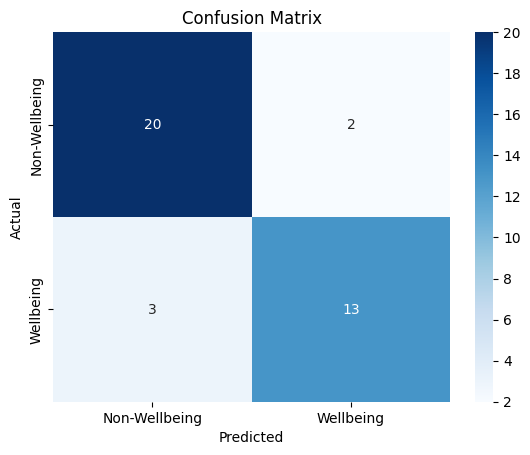

In [41]:
# ===== Model Evaluation =====

# Predict on the test set
y_pred = model.predict(x_test_tfidf)

# Accuracy and classification report
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Wellbeing', 'Wellbeing'], yticklabels=['Non-Wellbeing', 'Wellbeing'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [7]:
# Prediction function
def svm_predict(query):
    # Load the saved model and vectorizer
    model = joblib.load('./wellbeing_svm_tfidf.pkl')
    vectorizer = joblib.load('./tfidf_vectorizer.pkl')

    # Transform the query using the vectorizer
    query_vec = vectorizer.transform([query])

    # Predict the category
    result = model.predict(query_vec)[0]  # Extract the single result
    if int(result) == 1:
        print('category: wellbeing')
    elif int(result) == 0:
        print('category: non-wellbeing')

In [9]:
# Example usage
query = "machine garden day little sun today little less water tomorrow fallow fruitful season design flaw wiser perpetual stainless garden today lately consistent goal school keeping fitness morning afternoon evening feeling inevitably reminded bad past event brought old feeling sadness anxiety sometimes even whenever genuinely happy bad bound happen occurred didnt didnt planned job relationship school seems progress youve made dissipated doesnt meaning logical brain true matter emotion lead dark place honestly happened recently im im let sucked dark hole picked camera join day trying better im let sucked dark hole im let sucked dark hole spoon inside head life tumultuous excited confused disorderly however calm stable life appears closer reveal theyre part human experience sometimes imagine ups life heartbeat straight line life heart monitor accepted inevitability thinking peak away moment happiness struggle lot thinking whatifs spoil happiness front finished practice sad last practice since aware phenomenon use advantage around motivate challenging period low point sooner later inevitable bit love easy cant im gon na start home road indigenous find forward sometimes enter dark place seems future hopeless event control impossible cost living environmental concern bring lot accomplishment seem meaningless grand scheme therefore try closer smaller even superficial life day day sunday new episode favorite show release recently looking forward journaling night release creativity thought sport game small saving buy people live life present work sometimes particularly stressful moment beneficial forward amlants atherapist lanaya smith crawford im sorry cried im bed im telling im boring person dont spontaneity routine order comfortable sometimes thats telling avoid comfort zone day day course thats boring im motion everyday life truly living threw planner decided spontaneous trip best friend city visit parent havent seen month excitement spontaneity refreshing rare didnt plan advance felt relaxed flexible made wasnt missing moment joy im people said happier act spontaneously according study conducted poll veto schedule"
svm_predict(query)

query2 =  "So, Erica Palet, we spoke about the mind map and how to use the mind map to get everything out of the crew. How do you think we're going to integrate all these ideas from the crew? We are starting with a small idea with the starting mind map, so we will increase the amount of things people think about. And they can find it on SharePoint and they can include their own ideas through an email and then we can complete the mind map with the whole crew. Transcription by ESO. Translation by —""Data Processing.ipynb"
svm_predict(query2)

category: wellbeing
category: non-wellbeing


In [44]:
# Print the chosen parameters of the SVM
print("SVM Parameters:", model.get_params())

# Display the classes the SVM is predicting
print("Classes:", model.classes_)



SVM Parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': True}
Classes: [0. 1.]


In [14]:
# Assume 'query' is a raw text string and 'pipeline' is your text_vectorizer -> svm_model pipeline.
model = joblib.load('./wellbeing_svm_tfidf.pkl')
X_test = [query, query2]
y_test = [1, 0]

vectorizer = joblib.load('./tfidf_vectorizer.pkl')

from lime.lime_text import LimeTextExplainer
import numpy as np

class_names = ['Not Well-Being', 'Well-Being']
explainer = LimeTextExplainer(class_names=class_names)

def predict_proba_wrapper(texts):
    X_vec = vectorizer.transform(texts)
    return model.predict_proba(X_vec)

text_instance = query2  # raw text
exp = explainer.explain_instance(
    text_instance,
    predict_proba_wrapper,
    num_features=10
)


exp.save_to_file('lime0.html')


In [15]:
text_instance = "So the idea is to use one of those containers. So we will have fresh marine water coming from the sea. As you can see from these pipes, we have filtered seawater because we have a filtering system outside this building. But also we can collect natural water, so unfiltered, so we can have actually the same conditions of the airport. So the water will be collected in these tanks and then I will apply a piping system and the device will be connected before to reach the tank. In the tank there will be the marine organisms that I farm on the raft, we have a raft in this harbor. So I have samples where I farm the marine organisms, barnacles, mussels, humicates. Okay. So the idea is just to see the effect of this antifouling device on the big marine organisms, so at adult stage. But also because the water will come directly from the sea, I want to see what is the effect of the organisms directly coming from the sea. So I will have a transparent pipe where I can see with my eyes if biofilms or bacteriums unicellular algae will grow inside. The individual inspection? Exactly. Plus blanket, blanket panels that I will collect and I will inspect with the microscopes to see exactly what is... The impact of the antifouling. Yeah. And then we'll have two of the systems, one with the antifouling device and one without. And then we'll see the difference. Okay. So... And this is what you call the antifouling device? Yes. Okay."  # raw text
exp = explainer.explain_instance(
    text_instance,
    predict_proba_wrapper,
    num_features=10
)

exp.save_to_file('lime1.html')

In [16]:
text_instance = "Hello again, here am I. And of course, all the answers that you've made up are as important for the solution than my answer. But my view is shown at the back. The Navy spends an enormous amount of effort to get fuel to the vessels, but also the size of the vessels is very much determined by the amount of fuel the vessel needs to take to perform her operations. So if we move to alternative fuels, all these alternative fuels are less energy dense. This means that for the same amount of volume and weight that is on the on the current air defense command frigates, which you see on the background, if we switch to methanol, we actually need to take twice as much fuel in volume and weight. And we can probably instead of operating for five weeks, we can only operate for two weeks if we don't buy a bigger and therefore more expensive, fuel. If we move to hydrogen, we're probably left with only a week of operations. And if we start using batteries, it's probably not even a working day. So the impact of alternative fuels on the design of the vessel increases with a factor two, four or maybe even more than 10. And therefore, reducing the energy requirement of future vessels is much more important in future than it is now. And that is to ensure that actually operating at sea stays affordable. So we really need to keep working on this together. And we really appreciate the input from the crews. And I am very much eager to get feedback from this event and use the best ideas that come out of this in our design cycle in the Defense Materiel Organization. Thank you very much."
exp = explainer.explain_instance(
    text_instance,
    predict_proba_wrapper,
    num_features=10
)


exp.save_to_file('lime2.html')

In [17]:
text_instance = "Hi guys, my name is Koen and I am in the Oceans 1 Pioneers team. I'm the chair of this team, so I'm open to all your general questions. Just let me know what you want to talk about and maybe we can have a good conversation together. In my daily life I'm studying shipbuilding at Delft University of Technology. So my passion is really about all the technical aspects of this movement. So if you want to talk about some technical stuff, just let me know. Maybe we can find a solution together. And yeah, let me know what you're up to. I'm curious about what you're doing and what challenges you're facing. So let me know and see you around."

exp = explainer.explain_instance(
    text_instance,
    predict_proba_wrapper,
    num_features=10
)


exp.save_to_file('lime3.html')

In [18]:
text_instance = " Tell someone life sucks and they immediately become in repair mode and try to fix you or try to fix themselves and say no life doesn't suck how can you say that that's so negative and you're castigated you feel like oh you are an outsider looking into a world that can be discovered beyond happy smiley faces. When you embrace that life sucks stuff goes wrong all the time things break down relationships you get your heart broken you lose jobs you have money struggles the world's at war people always fight they gossip they lie if you go in with that attitude that life sucks it's so contradictory to the way we've been conditioned the way we be conditioned is be happy if you for example if someone asks how you're doing usually they don't care when they ask how you're doing that condition responses oh I'm wonderful I'm great I'm fabulous I'm doing well I'm good thanks for asking I love to say yeah I'm terrible I'm doing really really horrible and the see people's reaction what really what happened what's wrong what's the problem is there anything I could do to help it's like we automatically want to fix ourselves we cannot tolerate being unhappy because we have this expectation that we're supposed to be happy that life's supposed to be great that we're supposed to be successful that we're supposed to have the right job the right relationship the right house the right partner and this is just not the way life works so what we do is we spend all our lives rearranging all the puzzle pieces pieces to make us happy and boom falling on their face boom get bumped boom get arrows in the heart boom get punched get dad get daggers in our back and then we can't understand why we are not happy and it's this constant treadmill approach I need to be happy okay I'm going to be happy this is what I have to do happy I'll read this book or I'll talk to this person or I'll make this change so that's the very complex complement a complicated way of trying to be happy it's like trying to juggle tennis balls or knives or swords and each you know every hour someone adds another sword another sword and you're constantly trying to juggle and make everything work when you go in to life it's like going into a movie the moment someone tells me a movie this is the greatest movie it's fantastic you love it yeah it's amazing and you think oh my gosh I can't wait to see this movie and your expectations are way up here and you go and you see the movie and you're like oh my god that was terrible but if you go in a movie that you let's say you're a girlfriend your boyfriend or your wife or spouse dragged you into and everyone said this movie stinks this movie you're not going to like it it's dumb it's corny it has no plot the acting horrible your expectations are so low that you might actually enjoy the movie that's not going to win Academy where do you mean you're not it's you're not going to love it you probably won't see it again but the chance of you enjoying it is going to be a lot greater what shifted the movie was still the same what shifted is your intention attitude and approach and expectation more importantly before you go when you went and see this movie well life is the same way life sucks get used to it except it there's drama people are complaining all the time it's not it's not a picnic and you want to know what the good news is is the good news is we would have it no other way why do you think we love the news we love negative news that's why they're always showing violence and murders and war on TV because believe me if good news reported good news uplifting stories positive things that people getting along people helping out and volunteering for each other if that got ratings and made money it would be on TV all the time but we love challenge struggle when things go wrong we don't like when things always go our way in the matrix they had a great scene when they talked about how they originally did the computer programming when they had all the people plugged into the matrix the first program was everything was perfect smooth love peace happiness enjoy everybody got along and all the pods all the humans died there's something deep within us that needs that turmoil the struggle the challenge it like refines us and helps us grow but yet at the same on the on one hand we need that on the other hand we resist it and it's not the problems that causes to suffer the challenges those are can be blessings in the skies what causes us to suffer is our resistance to it i shouldn't feel like that we're like we're like little kids all grown up in adult bodies spoiled little brats i can't believe that person said this to me i can't believe i didn't get the job oh my god what's gonna happen this person doesn't like me uh things aren't going my way and we're constantly in that that friction mode friction friction and we blame the problems we blame life instead of looking in the mirror and saying what is my approach what is my approach what is my expectation am i expecting these things to work out because if you are you're a fool you're you're you're and you're up so you're fooling yourself and you're creating your own suffering so when you say okay life sucks get over it and then you can move on and then you go in it's like going into a movie with low expectations you don't have these expectations a plan other people you don't have these high perfectionist expectations upon yourself you don't have expectations upon your job it's you're not trying to extract your happiness externally because you realize everything you need resides within and as within so without so and most people live their entire lives reverse in a chaotic world where there's continuous problems and then they can't understand why they're unhappy and we always think that next carrot if I could only get this that will make me happy and it's this constant walking and bumping into walls so freedom liberation is realizing our true nature getting centered and saying you know if you if it's meditation works for you if it's stillness just something magical about stillness just being still and we claiming your energy and going within and then you realize hmm man despite the chaos outside outside in the real world everything's cool everything's legit everything's a okay and then you're not reactionary right now most people live their lives reactionary oh this person did this to me you know just constant constant suffering that we that self created so man that's great news life sucks life sucks and in that you bring different energy to challenges and when things go wrong you learn you grow you prosper when things go wrong because when life doesn't go your way it reveals your true character it reveals your true nature it reveals your weaknesses it reveals your strengths and it tells you what your homework is and normally we blame other people other situations for unhappiness instead of saying hmm I'm unhappy about this and that is my assignment that is my homework I have to do some self examination some stillness meditation whatever it is we center myself and find out why I am tossed like a read in the wind based on what happens externally oh man when you know life sucks and that there's just tremendous suffering in the world you can be at peace because you're loving things as they are and there's this you're putting out the fire of resistance and enjoy it it's a it's a joy ride once you get on it and once you start becoming a conscious of how often we are in resistance mode and we have this false ideal that life is supposed to be grandiose we're supposed to be life is supposed to make us happy we're supposed to be successful we're supposed to be excellent at things we do we're supposed to have people like us have money in the bank once you say oh man no all that's just all we've been conditioned we've been conditioned to believe all that so we keep on chasing this the the illusion the imaginary carrot that we doesn't doesn't go with us when we die and it's so temporary and let's return to what is real what is important and that's just going in we're finding your true nature connecting to your intuition your inner compass and then having the courage to live accordingly"
exp = explainer.explain_instance(
    text_instance,
    predict_proba_wrapper,
    num_features=10
)


exp.save_to_file('lime4.html')

In [19]:
text_instance = "again I've always been envious of girls who are friends with each other you know girls who have lots of friends when you are alone you figure out a lot of things that you never really know about yourself when you're just completely alone with no friends I feel like there's a certain breakthrough that you probably never have am I worthy of having friends don't ever let having no friends to stop you from living your best life whoa hey that was a really bad intro anyways hi everyone welcome back to my channel so for this journal entry episode eight we're going to be talking about why having no friends is completely okay I'm kind of shocked that I haven't talked about because as you guys can see I do a lot of things by myself I've always had trouble keeping friends long term this can go into a lot of issues of mine and as a kid I've always been extremely insecure because I didn't have you know a lot of friends that I had like really low self-esteem ever since I was a kid I did everything by myself but it was always kind of like I had to I didn't really learn to enjoy doing things by myself as a kid I've always been envious of girls who are friends with each other you know girls who have lots of friends and I always wanted to be like that but as I gotten older I realized how having no friends is really okay it really is when you are alone you figure out a lot of things that you've never really known about yourself because sometimes when you're in group setting a lot of us tend to just like go with the flow you go with what your friends want I want to do this because I just want to enjoy their company which is completely fine but you don't realize what you want you like this activity because you guys are doing it together right you have your friends company you like their company so as you like this activity that doesn't mean you like this activity when you have no friends to hang out with all you have is yourself so you really try to do things that you enjoy right it's very obvious like you know we all want friends so it's very very normal to feel lonely because sometimes I feel like when we feel lonely it's like you feel bad about it you're like but you need to understand that is very very normal it is normal to feel lonely it is normal to want company from people and start pushing the thought away I tell myself that this is normal I'm a human being I shouldn't want to socialize with people friendships can also make you feel lonely just because you're in a group of people doesn't mean that you would feel included right somehow you're in a group of people feel like an outcast you just feel like oh my God like I feel like nobody here really gives two shits about me like I said I'm just here just to be here I just want the company of others even though I'm not really enjoying their company so would you rather be feeling lonely by yourself or feeling lonely in a group personally I would rather feel lonely by myself like what's the point hang out with people if you feel lonely when you're with friends you can become so fixated on them you can become so focused on them that you don't really care about what you want you don't care about the goals you have because some of us just want to hold on to that song want to hold on to these friends because you just feel you've been alone for so long what if they leave me what do they leave me for someone else whether I'm not good enough and I don't blame you because you know we all want friends sometimes you might even lose your passions and your goals you might set that aside it's like a thing that you don't even realize and that is not to say like this is a friend's fault it's our fault I'm not encouraging YouTube boyfriend when you're just completely alone with no friends I feel like there's a certain breakthrough that you probably never have I mean of course it gets dark sometimes but also it can be a breakthrough you realize how capable you are to do absolutely everything by yourself once you have this mindset even when you get back into friend groups you will still have this mindset I personally don't think it can be taken away once you have this breakthrough when you have no friends you realize that I have to do everything for myself sometimes these things is just like you have to just do it you have so much fear you're like oh my God I cannot do this I have to do this with someone else but you can literally sometimes we just overthink but the things that when we think so much about it it's a waste of energy it's literally a waste of energy to be anxious about a 24 7. just do it because trust me when you actually do the thing it's not as scary as you think I feel like sometimes when you just have no friends sometimes you try to prove yourself am I worthy of having friends and then you start doing things to make yourself feel I need to better myself feel I'm worthy for friends but the things that you are worth your friend you can create a better version of yourself but make sure that you're creating it for the right reason you're creating it for yourself that's a proof to anyone that you are worth your friends because you are I I had this negative mind this where I feel oh I don't deserve friends because I have mental issues friendship breaks down I blame it all myself I'm like oh this is my fault this is my fault I was the one who called it off I'm the one who who left for friendship to work there needs to be both parties right I sometimes need to remind myself that they also didn't do anything to fix the friendship I tell myself that just because I am mentally ill doesn't mean that I don't deserve friendships and this was something that I felt like almost as if I'm punishing myself but when I came to realize is that I am trying to better myself and I feel like that counts for something if you feel like oh my God I feel so alone I have no friends like I must be such a loser but the thing that you cannot force it just because you have friends doesn't mean that you're you're less worthy compared to other people who do and I'm also not saying that like oh we should look down on people who have friends because there are friendships that are extremely beautiful healthy healthy friendships you know supporting one another some of us just haven't found the right people and I want you guys to stay home cool really genuine so easy to just be like that's their fault steer for us for somebody it is but sometimes you realize maybe I'm the problem it speeds up your self-growth when you realize that there's a problem within you because we're human we all have problems don't shame yourself don't try to close yourself off just because all my friends down it doesn't mean that you're not gonna have friends in the future right there's a lot of people who are dealing with us especially if you're in your early 20s it's not talked about enough once you realize how capable you are when you are alone it's almost like a superpower in how your happiness can come from just within yourself you don't need anyone to complete you yes I can help it can make you happier but you can get all the happiness you want from within yourself you can spread happiness when you are happy if you are unhappy how the hell can you spread happiness [Music] I'm not saying that no you have to spread happiness to others it can make an interaction more joyful and you can realize how when you are happy you attract more people like I tend to get insecure and sometimes like I project I sometimes just think oh just because I'm insecure about so and so they probably think bad of me which is really toxic and it goes to show you this because I'm insecure but if I was happy if I was confident this interaction that happens with another person will be great I wouldn't be so self-conscious I I wouldn't think about it I want to think that because I'm confident I'm feeling good which is why I believe that you need to achieve your happiness foreign you can achieve all the happiness with yourself you want to go sit by the beach go sit by the beach and when you do these things that builds up your confidence and when you build up your confidence you realize how you can do almost everything by yourself I'm not saying that you're doing all of this to just you know attract people but you're becoming happier at the same time you're attracting people so it's like a win-win why not I'm not trying to be like oh you can do everything by yourself so you don't need other people I'm saying that don't close yourself off to people I want you guys to enjoy her alone time but when people come you can be the judge of that who you want to let in slowly get to know them don't get attached too fast don't build this image of them of food they're gonna be and don't feel like and so be it they're not right for you slowly get to know them and be patient they'll slowly show you who they are and then get to decide whether you want to continue pursuing the apprenticeship I feel like I have been more open to people that I have been able to meet a lot of good people good friends this year when I hang out with friends I like it's like I genuinely enjoy it like I genuinely go back home like I really enjoy that interaction which I'm really proud to say because like back then I sometimes go get home from interaction with like friends and it just it feels awful however I still at the same time enjoy my alone time as well because there's something different when you hang out by yourself it's also amazing when you can hang out with really good friends you need to make sure that you don't lose your sense of identity when you hang out with people I mean of course your identity can always change but just hold on what feels true to you hold on to yourself no matter who you hang out with it took me to lose the Friendship to understand who I was and I'm not saying like oh my God that friendship in order to figure out who I am when the friendship ended I realized how much things I wanted to do that I never realized I wanted to do before because I was just fixated on them ever since then I know what I want and I have goals I know what I like and I know what I don't like and this all happened because I was alone for so long [Music] do a lot of things by myself a lot what you guys can clearly tell from the content of this channel life can be very lonely something that makes it more bearable is just finding things that you like doing life is worth living with kind people and sometimes it can just take a little tiny thing to make your day really really great it's normal to feel lonely and feel like you have no one to talk to but don't let that stop you from living don't ever let having no friends to stop you from living your best life okay because you're life does not depend on others you have yourself and that is more than enough all you need to do is believe in yourself and when you realize how much you can achieve when you are alone you become Unstoppable and I'm not lying with that I'm really not the reason why you'll be unstoppable is because the things that you want to do no one can stop you the only person that can stop you is yourself so when you realize that I'm not gonna become my own obstacle and you go achieve that you can do it just because you have no friends doesn't mean that you can't achieve your dreams or whatever has certain issues that are preventing your own reading products that's why self-reflection is very important going to therapy journaling self growth important when you have these issues you you want to get better [Music] um that's the end of my journal entry episode eight why having your friends is completely okay I hope you guys enjoyed the journal entry I'm really happy to be able to talk about this I guess I wish someone had told me this maybe when I was younger um which is why I'm making this video trust me you'll find good people along the way but as of now better yourself and do what makes you happy okay okay anyways I will see you guys all very very soon I hope you guys will have a lovely rest of your morning afternoon or night okay okay bye"
exp = explainer.explain_instance(
    text_instance,
    predict_proba_wrapper,
    num_features=10
)


exp.save_to_file('lime5.html')

In [21]:
text_instance = "I'm doing the best I can. I really want to make it. I'm working for the whole day. I'm working for the whole day. So, my parents have a 12 years age gap. Been major differences in their personalities. I'm not going to go into detail, but let's just say it hasn't been easy. Mom is super into healthy stuff. I like to enjoy some unhealthy food from time to time. But he has a height of form. I��터 a lot of time. I love to eat food. Hey, glad you're here. I'm Chloe. This is the story of me finding love and trying to figure out what that really means. that really means. You're all my life that met some people, but somehow never worked out. To be really honest, I'm starting to wonder if I'm the problem and being the common denominator. I don't think I grew up having a good idea of what an ideal relationship or marriage should look like. And still not quite sure even to have a stay. I don't know. What is love? What on earth truly matters in happy relationship and marriage? And how do you know someone is the one? Ever since you're home from looking at your parents, I started developing this life goal. I need to find a partner whom truly compatible with I want to find someone who I can connect with emotionally, intellectually and spiritually on all levels, also having a cancer with. I want to be able to chat about anything. I want to be able to be myself and all in love with the way that I am in an relationship. And I want that for the other person to us. But how where is that person to see even exist? I don't believe there's such thing as soul-made. I don't think there's someone perfect for me on theory there. But I want to know how close I can really get. You know, I mean it's a decision of a lifetime, isn't it? However, as time goes by, I'm starting to feel the clock ticking louder and louder as my friends are getting married and having kids. And then there's me. I don't know what to say. I think as I get older, it just gets harder and harder. I remember the good old times when dating gets to be easy. But now I don't know what happened to me. I'm starting to wonder if I'll ever be able to find someone. Perhaps it's really time to take it more seriously. But meeting people is honestly so time-consuming and tiring. We don't have that much time to spare. We need to approach it more effectively. We need strategy. I'm ready. My wings drives me crazy. Dressing up, fixing my strife. Always prepared. You never know who. Show some for a raccoon. Maybe it's that director. Oh, I can sing. I can dance. I can learn the smooth moves. I will do anything you ask me to. Jump out on the stage. Get locked up in the cage. I read your. Glitter and it's such a glamour. Why not impress me? Show me your ring. I hate you. So I've been reading this book. How to not buy a loan. Buy a logonery who is the head of relationship science at hinge in a Harvard behavioral scientist. I started reading this book because personally, for a really long time, I thought dating is quite difficult. I think it used to be pretty easy, but the older I got, the more difficult has become. And I do believe that dating is a skill that can really change your lives. This book gave me some perspective on what a meaningful relationship is and what it's like to have a more healthy approach to dating. So top five tips that I found very helpful. Tip number one is know yourself. Finding all your dating blind spots. A lot of us actually have this pattern that may be hindering us finding a partner. And Logan, I demify it three types of data. One is the romanticizer. Second is the maximizer. And third is the hesitated. And the romanticizer loves love. These are the type of people who believe that they're so made. And they believe that there's this one person out there for them. And they just need to go out and look for this person. And once they find this person, loving and dating would just be so easy and effortless. And so when their inner relationship and things don't work out, they tend to think that it's because they're not with the right person and they'll just end things and go off on the journey of finding again. And the cycle just repeats. And the second type is the maximizer. I think personally I fall into this category. I want to know what you guys are. Hopefully not in these. But I think I'm the maximizer. So the maximizer are the ones who try to optimize their options. And they have unreal expectations of their partner. This is a kind of person who is always thinking, can I just be with someone that's just 5% hotter, just 5% smarter. So they're always wondering what else is out there, rather than fully committing into a relationship and making things work. And third is the hesitator. This is type of person who has unrealistic expectations of themselves. They feel like they're never really ready for a relationship and they'll say that I'll be ready to date. When I lose 10 pounds or I'll be ready to date when I have a more impressive job. So instead of getting out there and learning about dating and learning more about themselves, they're always waiting for the day to come where they're fully ready. Share in the comments and let me know if you identify yourself within you at least. I think I'm the maximizer. And tip number two. Throw away your checklist and forget about ideal type. You know the song I'm looking for a guy in finance, trust fund, 65, blue eyes. I think it's really interesting how we often ask others what is your ideal type? I used to think about this so seriously, but now I've come to realize that it doesn't really matter and they probably don't exist. Logan suggests that we should throw away our checklist because after we go on a date, we tend to prioritize things that are more on the service, things that are easier to measure such as appearance, height, status, over long-term qualities that are deeper and more long-lasting. However, these are actually the key to a happy and fulfilled relationship. So what are the qualities that truly matter in a happy and meaningful relationship? Instead of looking for a guy and trust fund finance, look for someone who is emotionally stable, someone who is kind, someone who has a growth mindset, and someone who can communicate well and fight well. So these are actually the qualities that really help the couple building in a relationship, nurture the deeper connections that help you weather the ups and downs of lives. Tip number three, don't fall into the interview trap. So I like what we talked about earlier, we really go into a date with a list of boxes to check. I'm trying to figure out if this person is worth my time and if there will be a second date. I'm not going to lie, I was definitely like that. Constantly evaluating rather than just being in the moment. So the problem with that is when you treat like an evaluation, it's easy to miss out on the spontaneous and genuine interactions that foster real chemistry, and for you to really get to know this person on a more genuine level. So instead of treating like an interview where you're focusing on the checklist, try to be present in the moment. I think that would just help both of you to relax better and be yourself. Stop focusing on what they look on paper, focus on how you feel around them. Tip number four, take the experiment to approach and get out of your comfort zone. So instead of just getting dinner, why not try doing activity together? Why not go do a new place together? Now just go and have fun and see if you vibe. I think this is especially true for me because as I get older, I notice that my checklists tend to get longer and longer. But at the end of the day, I think I can still be really happy with someone even if they don't check all the boxes. And so nowadays when I approach dating, I think I'm definitely more open-minded to meet all different kinds of people. And yeah, just really challenge my assumptions about what brings me through happiness. And try to avoid getting fixated on the sparks or love at first sight. Instead, try to embrace this concept that's mentioned in the book called Slow Burn. So Slow Burn means someone may not be particularly turning upon your first meeting, but would make a great long-term partner. Tip number five, this might be my favorite. Don't let perfect be the enemy of great. We often see people living in very envious life who has everything but are not happy. And we also see people who don't have much living a simple life and very content with what they have. And it's going to be thinking like, what is it that separates them? And I think the answer is the mindset. It's how we feel about it, rather than what it really is. When we're choosing a partner, I think it's impossible to just feel completely happy and satisfied by the choice itself. But rather, it's how we feel about that decision. Because you're never going to know what it's like dating everyone else. It's not a real issue to be bothered with. You can either constantly wonder what's potentially out there, but in that case, there will be more difficulty for you to feel happy. Or you can learn to appreciate the love and support that your partner is giving you. The bond and connection that you share. Life or things in general don't come with inherently. We create and assign our own means to them, your actions, thoughts and values. In fact, it's usually the investment into building something, till it nights, the artwork, perseverance, the imperfection that makes something so beautiful and meaningful. And that's greatness. Oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh. When people talk until what you wanna hear now, But they all disappear, they will let you down. So we better stick together, It's come whatever we're not coming home tonight. What is love? I think I finally come to understand love a little better. It's commitment. And in a way, it also means settling. Love is a decision. A decision to settle. A decision to stay. A decision to give. A decision to trust and embrace. It's made up by a series of small choices we make every day. Every morning we wake up and we choose this person again and again. Even if someone better comes along. Even when things get hard. Perhaps this is what real love is. A simple, yet solid feeling. And the answer was never out there to be looked for. The answer was always been here within me. I need only you and this crazy girl. We got along.in"
exp = explainer.explain_instance(
    text_instance,
    predict_proba_wrapper,
    num_features=10
)


exp.save_to_file('lime6.html')